**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Neutron Diffusion on a Spherical Domain in Vacuum
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:** 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Mar2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Analytical Solution](#analyticalsol)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
    - [One-Group Energy](#onegroupenergy)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

- Introduction to motivation for neutron transport problems

## [Problem Statement](#toc)<a id="problem"></a>
#### Outline:
1. Define strong form of the PDE and analytic approach for neutron diffusion.
    - Define the point source solution for a homogenous and attenuating medium.
    - Define the integral transport equation solution for the point source solution. 
2. Define the Galerkin weak form of the problem
    - Set the integral weak form for the FEM
    - Define the boundary conditions for 1 group and multi group diffusion equations.
3. Define the diffusion equation differences for each approximation.

### [Strong Form of Problem Statement](#toc)<a id="strongform"></a>

This investigation looks to determine how FEM computation of the neutron diffusion equation compare to linear transport theory given standard assumptions about the definition of the diffusion coefficient in homogenous mediums far from and close to voids. Defining diffusion coefficients for neutron transport is an active field of research and includes approximations such as isotropic scattering, linear in angle, nonlocal weighting of nearby average transport properties, Monte Carlo study and experiment.

Understanding the connection between linear transport theory and diffusion theory is important for analysis of radiative transfer and neutron transport under certain physical conditions for reactor research and dosimetry studies. Here we will compare the analytic linear transport result for non-absorbing and moderately absorbing mediums given a point source in spherical geometry.

The multi-group (energy group) time independent neutron diffusion equation (NDE) in written assuming azimuthal symmetry as

Compute $\Phi_g:[r_\text{i},r_\text{o}]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
  \nabla \cdot D_g \nabla \Phi_g(r) - \Sigma_{g,r} \Phi_g(r) + S_{g'\rightarrow g} &= 0 \\
   J_{n,g}(r_\text{i}) &= \Phi_{0,g}, \\
   J_{n,g}(r_\text{o}) &= \frac{\alpha}{2}\Phi_g(r_\text{o}).
\end{align*}

where the source term $S_{g'\rightarrow g} := \sum_{g'=1}^{G} \int_\Omega \Sigma_{s,g'\rightarrow g}\, f_{s,g'\rightarrow g}(\mu)\,d\Omega$ is the group down-scattering contribution for each group $g$. 

The neutron scalar flux is: $\Phi(r)\ [n/cm^2 s]$. Here for the free surface (vacuum) boundary condition. The neutron density at the outer boundary $\Phi(r) = |v| n(r) = 0$ if $ n_b\cdot \Omega < 0 $.



The total macroscopic cross section is: $\Sigma_{tot} = \Sigma_{non-el} + \Sigma_{el} \approx \Sigma_{abs} + \Sigma_{el}$

And the removal cross section for the multi group cross section is $ \Sigma_{r} = \Sigma_{tot} - \bar{\mu}\Sigma_{s} $

For brevity, $S' = Q^{fis}_{ext} + Q^{sc}_{in}$, is written as the combined source for exterior sources and fission sources or scatter in from out of group (up and down scatter). The full _scatter in term_ requires a _group averaged scatter cross section_ that further requires a _transfer function_ differential in post collision direction $\Omega \cdot \Omega '$. 




### Domain
Describe domain here.

In [1]:
def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = 1
    radius_o = 20 * radius_i
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1)) 

    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.99,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')

    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

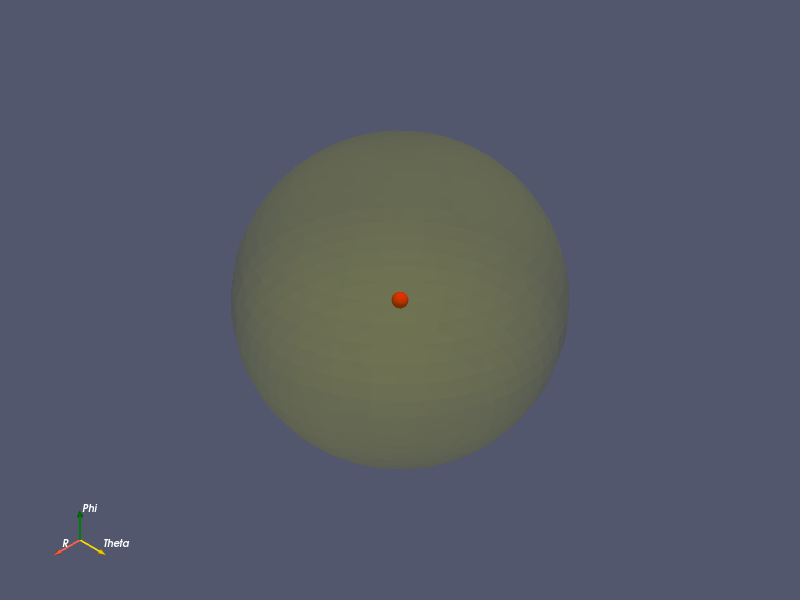

In [3]:
show_domain()

- In the NDE boundary conditions above, Dirichlet boundary conditions are assumed for the neutron density from a point source. Alternatively, interface coupling may be considered between a small sphere's inner surface with the second domain where Neumann BC for neutron current $J$ are given. 
- For the Galerkin FEM formulation, this is equivalent to the asymptotic assumption for the integral linear transport method as long as the inner sphere's source is not infinity. 

## [Approach](#toc)<a id="app"></a>

### [Analytic Solution - 1 Group](#toc)<a id="analyticalsol"></a> 

A general solution is commonly given without the asymptotic condition as:

\begin{align*}
    \Phi(r) =  \frac{S_0 e^{-\kappa r}}{4\pi Dr} \ \ \ (2)
\end{align*}

On the other hand, linear transport theory does provide a result at the asymptotic limit for moderately absorbing mediums given that the source flux is not infinity. The integral transport equation is written:


\begin{align*}
    \Phi(r) = \int dV\  \frac{S_0 e^{- \Sigma_t r}}{4 \pi r^2} [c \Sigma_t \Phi(r') + S_0 \delta(r')] \ \ \ (3)
\end{align*}

In this solution we will currently assume $S_0 = \Phi_0$ for a single distributed source.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 

The Galerkin weak formulation of the [strong form](#strongform) is as follows. Find $\Phi_{g=1} \in H^1\!\bigl([r_\text{i},r_\text{o}]\bigr)$ and $\Phi_{g=2} \in H^1\!\bigl([r_\text{i},r_\text{o}]\bigr)$
so that 

\begin{align*}
\int\limits_a^b D\, \Phi_1'(r)\,\psi'(r)\,dr - \int\limits_a^b S(\Phi_1, \Phi_2)\,\psi(r)\,dr &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([a,b]\bigr), \text{and}
\end{align*}

where $H^1\!\bigl([r_\text{i},r_\text{o}]\bigr) := \bigl\{ \Phi:[r_\text{i},r_\text{o}]\subset\Reals\rightarrow \Reals \mid \int_{r_i}^{r_o} \Phi'^2\,dr < \infty\bigr\}$ and $H^1_0\!\bigl([r_\text{i},r_\text{o}]\bigr) := \bigl\{ \psi \mid \psi \in H^1(r_i,r_o), \psi(r_i) = 0, \psi(r_o) =0 \bigr\}$. Both function sets as just defined are Hilbert spaces. The function $\psi$ is called a test function. Because $w$, $\Phi_{g=1}$, $\Phi_{g=2}$ are sought in very similar sets of functions, this weak form is called Galerkin's weak form.

1. Multiply NDE by a test function $\psi$.
2. Integrate over spatial and angular domain.
3. Use divergence theorem to set the boundary condition across the domain surface.

The weak form and boundary condition becomes:

\begin{align*}
    ( \nabla \psi, D \nabla \Phi  )\ - < \psi, D \nabla \Phi \cdot \bar{n_b} > +\ (\psi , \Sigma_{tot} \Phi) = 0 \ \ \ (1B)
\end{align*}

This weak form contains the volume and surface integral as written with parenthesis and brackets respectively. The boundary conditions for the partial currents at the surface given as $\Gamma^{\pm}$ must be solved for:

\begin{align*}
    \Gamma^{+} = J^{out}({R_S}) = \nabla \Phi \cdot \bar{n_b}
\end{align*}

\begin{align*}
    \Gamma^{-} = J^{in}({R_S}) = 0
\end{align*}

Here we will use the homogenous Neumann boundary condition, which is equivalent to the Robin boundary condition such that the reflectivity at the boundary is 0 as:

\begin{align*}
    \frac{1}{4} \Phi + \frac{1}{2} D \nabla \Phi \cdot \bar{n_b} = J^{-} = \frac{\Phi}{4} - \frac{J}{2} = \frac{\Phi}{4} - \frac{D \nabla \Phi}{2}
\end{align*}

Solving for the weak form boundary condition and multiplying our test function $\psi$:

\begin{align*}
     \psi (D \nabla \Phi \cdot \bar{n_b}) = \psi( \frac{1}{2} D \nabla \Phi)
\end{align*}

#### Steady State 3 Group NDE Weak Form for non-multiplying medium:

Assuming no upscattering from group 2 to group 1:

\begin{align*}
    -\nabla \cdot D_1 \nabla \Phi_1(r)  + \Sigma_{r,1} \Phi_1(r) =  - \Sigma_{s,1 \rightarrow 2} \Phi_1(r) \ \ \ (r) 
\end{align*}

\begin{align*}
    -\nabla \cdot D_2 \nabla \Phi_2(r)  + \Sigma_{r,2} \Phi(r) =  \Sigma_{s,1 \rightarrow 2} \Phi_1(r) - \Sigma_{s,2 \rightarrow 3} \Phi_2(r) \ \ \ (r) 
\end{align*}

\begin{align*}
    -\nabla \cdot D_3 \nabla \Phi_3(r)  + \Sigma_{r,3} \Phi(r) =  \Sigma_{s,1 \rightarrow 3} \Phi_1(r) + \Sigma_{s,2 \rightarrow 3} \Phi_2(r)  \ \ \ (r) 
\end{align*}

<!-- 
\begin{align*}
\int\limits_a^b D\, \Phi_1'(r)\,\psi'(r)\,dr - \int\limits_a^b \Sigma_{r,1} \Phi_1(r)\,\psi(r)\,dr &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([a,b]\bigr), \text{and}
 \\
  \int\limits_a^b \, \Phi_2'(r)\, \psi(r)\,dr + \int\limits_a^b D\, \Phi_2'(r)\,\psi'(r)\,dr + \int\limits_a^b S(\Phi_1, \Phi_2)\,\psi(r)\,dr &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([a,b]\bigr),
\end{align*} -->



    


\begin{align*}
\int\limits_{r_i}^{r_o} D_1\, \Phi_1'(r)\,\psi'(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{r,1} \Phi_1(r)\,\psi(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 2} \Phi_1(r)\,\psi(r)\,dr -\int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 3} \Phi_1(r)\,\psi(r)\,dr  &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([r_i,r_o]\bigr), \text{and}
 \\
\int\limits_{r_i}^{r_o} D_2\, \Phi_2'(r)\,\psi'(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{r,2} \Phi_2(r)\,\psi(r)\,dr + \int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 2} \Phi_2(r)\,\psi(r)\,dr -\int\limits_{r_i}^{r_o} \Sigma_{s,2 \rightarrow 3} \Phi_2(r)\,\psi(r)\,dr  &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([r_i,r_o]\bigr), \text{and}
 \\
\int\limits_{r_i}^{r_o} D_3\, \Phi_3'(r)\,\psi'(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{r,3} \Phi_3(r)\,\psi(r)\,dr + \int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 3} \Phi_1(r)\,\psi(r)\,dr +\int\limits_{r_i}^{r_o} \Sigma_{s,2 \rightarrow 3} \Phi_2(r)\,\psi(r)\,dr  &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([r_i,r_o]\bigr)
\end{align*}






### [MOOSE Kernels](#toc)<a id="kernels"></a>

The following MOOSE kernels were implemented to solve the [weak form](#weakform):
1. Diffusion term: $D \nabla \Phi \cdot \nabla \phi$
 + [interface](./include/kernels/DiffusionTerm.h) and [implementation](./src/kernels/DiffusionTerm.C).

### [Setup](#toc)<a id="setup"></a>

#### [One-Group Energy](#toc)<a id="onegroupenergy"></a>

## [Results and Analysis](#toc)<a id="ranalysis"></a>

- Text...

In [4]:
'''Plot function for FEM Solution'''

def plot_solution(df, 
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('dark_background')

    (fig, ax1) = plt.subplots(1, figsize=(14, 5))

    ax1.plot(df['x'], df['u'].abs()*2.4e9,'r*-',label=basis_functions_type)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$ [g/cc]', fontsize=18, color='red')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    ax1.set_ylim(1e-12,1e12)
    ax1.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [9]:
# !./neutron-ball-opt -i input2G.hit
# mooOut1G = np.genfromtxt('./output2G_x-data_0002.csv',delimiter=",",comments = '#')
!./neutron-ball-opt -i input1G.hit
mooOut1G = np.genfromtxt('./output1G_x-data_0002.csv',delimiter=",",comments = '#')




*** ERROR ***
/Users/pauljohnson/project/engy-5310/projects/neutron-ball/input1G.hit:50: missing required parameter 'Kernels/source-term/type'
	Doc String: "A string representing the Moose Object that will be built by this Action"


Stack frames: 15
0: 0   libmesh_opt.0.dylib                 0x0000000102ac941b libMesh::print_trace(std::__1::basic_ostream<char, std::__1::char_traits<char> >&) + 1067
1: 1   libmoose-opt.0.dylib                0x00000001021edf74 moose::internal::mooseErrorRaw(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >) + 852
2: 2   libmoose-opt.0.dylib                0x00000001016c5038 void mooseError<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >&&) + 280
3: 3   libmoose-opt.0.dylib                0x00000001021011bb

KeyError: 'u'

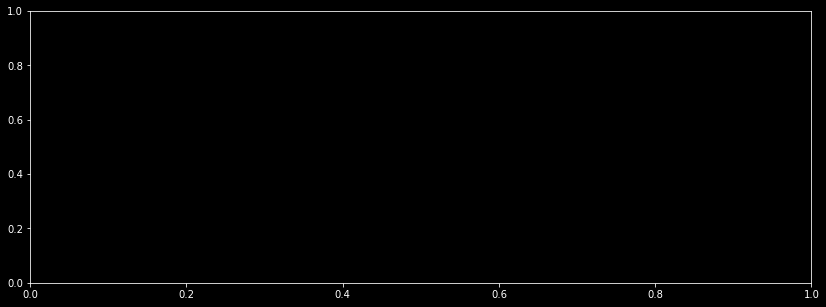

In [8]:

import pandas as pd
df = pd.read_csv('output1G_x-data_0002.csv')
plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Linear Lagrange', flux_basis_functions_type='Constant Monomial')


- Text...

## [Conclusions](#toc)<a id="conclusions"></a>

- Text...

- Text...

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] author, [reference]()
- [4] author, [reference]()